<a href="https://colab.research.google.com/github/AsadiAhmad/Sun-Flower-Counter/blob/main/Code/Sun_Flower_Counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Step 2: Download Pictures

In [ ]:
!wget https://raw.githubusercontent.com/AsadiAhmad/Sun-Flower-Counter/main/Pictures/sun_flower.jpg -O sun_flower.jpg

--2025-05-10 11:30:27--  https://raw.githubusercontent.com/AsadiAhmad/Sun-Flower-Counter/main/Pictures/sun_flower.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84290 (82K) [image/jpeg]
Saving to: ‘sun_flower.jpg’

sun_flower.jpg      100%[===================>]  82.31K  --.-KB/s    in 0.02s   

2025-05-10 11:30:27 (3.46 MB/s) - ‘sun_flower.jpg’ saved [84290/84290]



# Step 3: Load Images

In [ ]:
sun_flower = cv.imread("sun_flower.jpg")

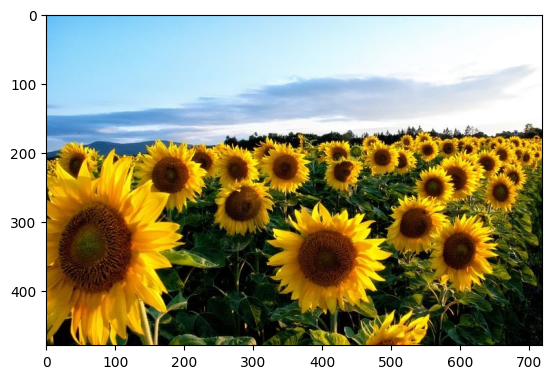

In [ ]:
plt.imshow(sun_flower[...,::-1])

# Step 4: Convert to HSV

In [ ]:
hsv_sun_flower = cv.cvtColor(sun_flower, cv.COLOR_BGR2HSV)

# Step 5: Filter Brown Sun Flower Color

In [ ]:
lower_brown = np.array([0, 50, 0])     # Lower bound (H, S, V)
upper_brown = np.array([20, 255, 75]) # Upper bound (H, S, V)
masked_sun_flower = cv.inRange(hsv_sun_flower, lower_brown, upper_brown)
filtered_sun_flower = cv.bitwise_and(sun_flower, sun_flower, mask=masked_sun_flower)

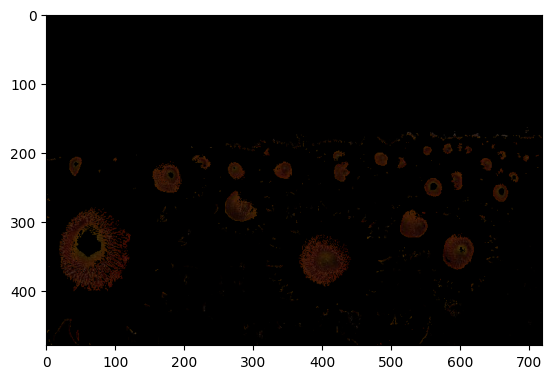

In [ ]:
plt.imshow(filtered_sun_flower[...,::-1])

# Step 6: BGR to Grayscale

In [ ]:
filtered_sun_flower_gray = cv.cvtColor(filtered_sun_flower, cv.COLOR_BGR2GRAY)

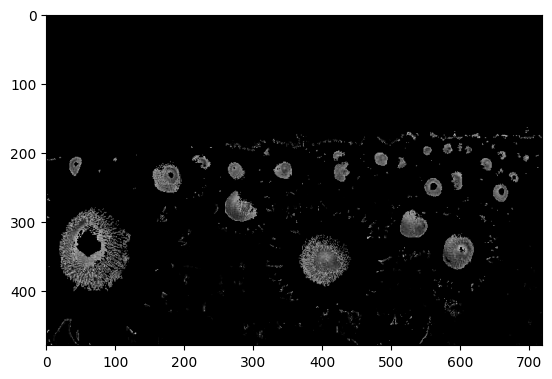

In [ ]:
plt.imshow(filtered_sun_flower_gray, cmap='gray')

# Step 7: Binarization

In [ ]:
filtered_sun_flower_bin = np.where(filtered_sun_flower_gray > 10, 255, 0)

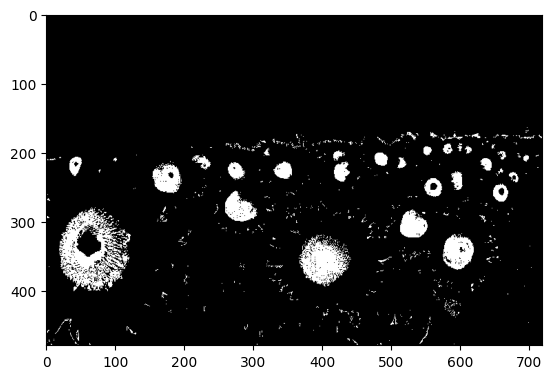

In [ ]:
plt.imshow(filtered_sun_flower_bin, cmap='gray')

# Step 8: Scale Image to unit8

In [ ]:
scaled_flower_bin = filtered_sun_flower_bin.astype(np.uint8)

# Step 9: Erosion for Removing Noise

In [ ]:
erosion_kernel = np.ones((2, 2), np.uint8)
erosion_sun_flower = cv.erode(scaled_flower_bin, erosion_kernel, iterations = 3)

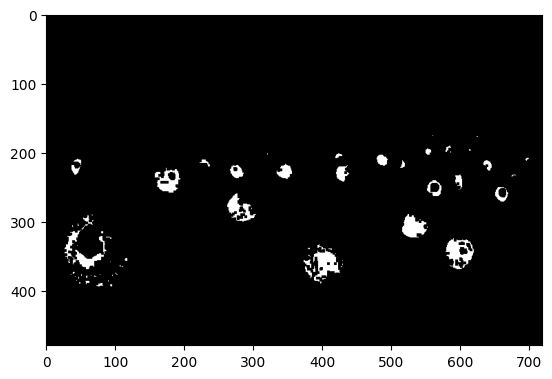

In [ ]:
plt.imshow(erosion_sun_flower, cmap='gray')

# Step 10: Dilation for Connecting Parts

In [ ]:
dilation_kernel = np.ones((3, 3), np.uint8)
dilation_sun_flower = cv.dilate(erosion_sun_flower, dilation_kernel, iterations = 5)

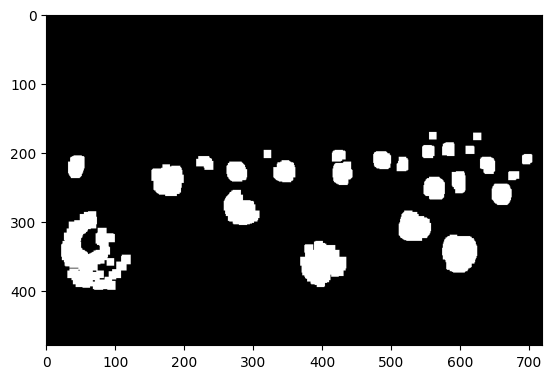

In [ ]:
plt.imshow(dilation_sun_flower, cmap="gray")

# Step 11: Counting Sun Flowers

In [ ]:
num_labels, labels = cv.connectedComponents(dilation_sun_flower)
flower_count = num_labels - 1

In [ ]:
print(flower_count)

26


# Step 12: Calculating Accuracy

In [ ]:
percent = (flower_count/29)*100
print(f'{percent:.2f}%')

89.66%
